## Лабораторна робота № 3
#### Рижкін Юрій
###### Варіант 9

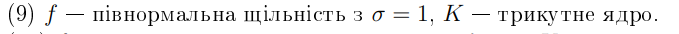

In [22]:

K = function (x){
    return ((1-abs(x))*I(abs(x)<1))
}

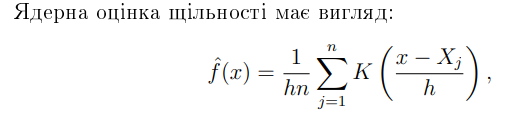

In [23]:
fn = function(sample,x, h) {
 1 / (length(sample) * h) * sum(K((x-sample)/h))
}



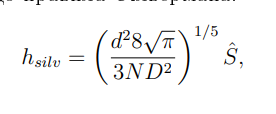

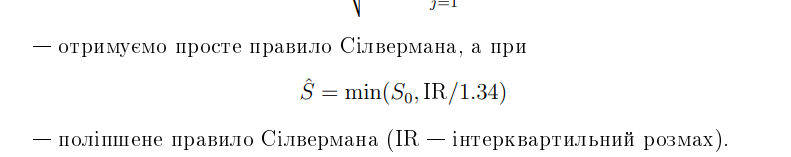

In [24]:
silvermanSimpl = function(x) {
 d2 = 2/3
 D = 1/6
 n = length(x)

 S0 = sd(x)

 hSilv = (d2 * 8 * sqrt(pi) / (3 * D^2 * n)) ^ (1 / 5) * S0

 return(hSilv)
}

silvermanImpr = function(x) {
 d2 = 2/3
 D = 1/6
 n = length(x)

 S = min(sd(x), IQR(x) / 1.34)

 hSilv = (d2 * 8 * sqrt(pi) / (3 * D^2 * n)) ^ (1 / 5) * S

 return(hSilv)
}

In [5]:
intersection = function(i1, i2) {

 if(i2[1] > i1[2] || i1[1] > i2[2]) return(c(0, 0))

 return(c(max(i1[1], i2[1]), min(i1[2], i2[2])))
}

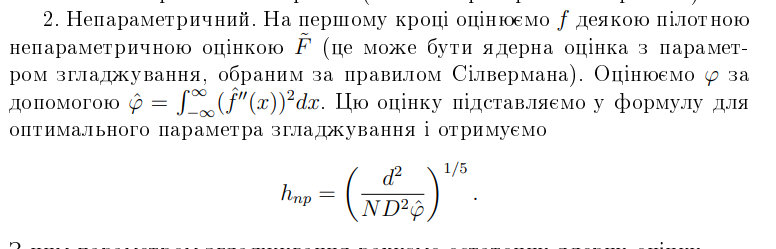

In [25]:
nonParam = function(x) {
 d2 = 2/3
 D = 1/6
 n = length(x)

 hpilot = silvermanSimpl(x)

 sum = 0

 for(i in 1:n) for(j in 1:n) {

 if(i != j) {

 inter = intersection(c(-hpilot + x[i], hpilot + x[i]), c(-
hpilot + x[j], hpilot + x[j]))

 sum = sum + inter[2] - inter[1]

 }

 }

 phi = 9 / (4 * n^2 * hpilot^6) * (2 * n * hpilot + 2 * sum)

 h = (d2 / (n * D^2 * phi)) ^ (1 / 5)

 return(h)
}


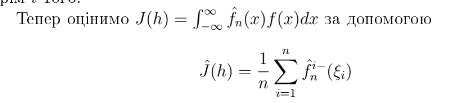

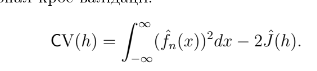

In [26]:
crossValidation = function(sample) {

 sequence = seq(silvermanSimpl(sample)/7, 1, length.out=50)
S2 = function(x, h) {
 sum = 0
 for (i in 1:length(x)){
 sum = sum + fn(x[-i], x[i], h)
 }
 return(mean(sum))
 }

 f = function(x, sample,h) fn(sample, x, h)^2
 f = Vectorize(f ,'x')

 S1 = function(x, h) {
 integrate(f, -Inf, Inf, sample=x, h=h, rel.tol = 0.1)$value
 }


 CV = function(x, h) {
 S1(x,h) - 2 * S2(x, h)
 }

 h_sample = c()
 for(i in sequence){
 h_sample = c(h_sample, CV(sample,i))
 }

 return(sequence[which.min(h_sample)])
}
    

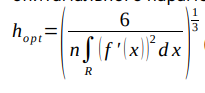

In [27]:
hopt = function(x) {
     d2 = 2/3
     D = 1/6
 return((3 / length(x))^ (1/5))
}


In [9]:
library("fdrtool")

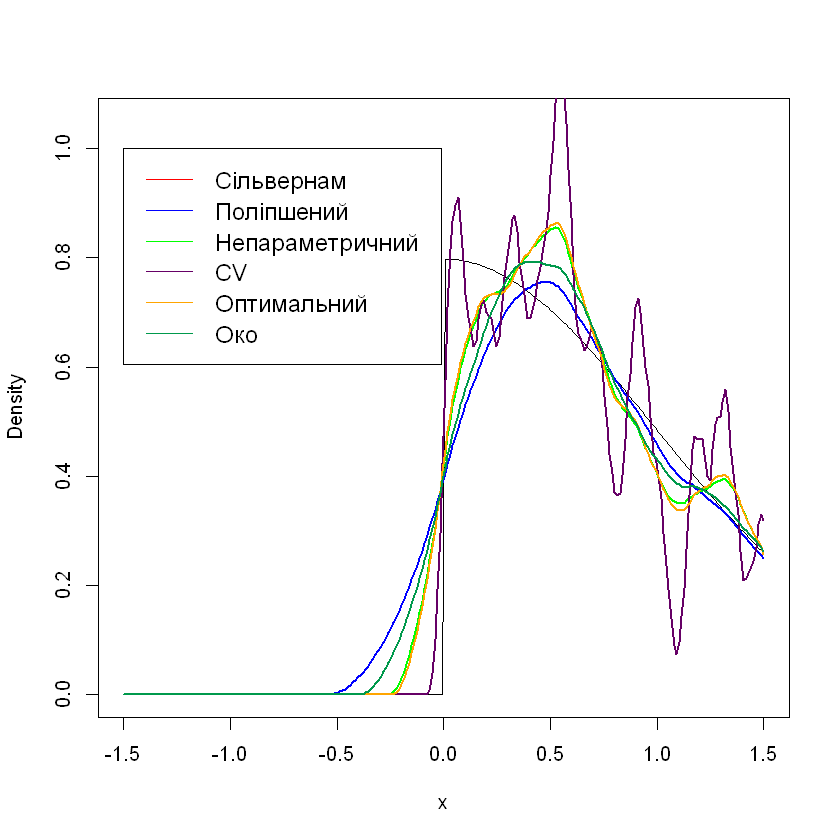

In [32]:
build_plot = function(n){

 sequence = seq(-1.5, 1.5, length.out = n + 50)
 ksi = rhalfnorm(n)
 h_silv = silvermanSimpl(ksi)
 h_silvimpr = silvermanImpr(ksi)
 h_nonparam = nonParam(ksi)
 h_cv = crossValidation(ksi)
 h_opt = hopt(ksi)
 h_oko = 0.4
 plot(sequence, dhalfnorm(sequence), type='l', xlab='x',
ylab='Density', ylim=c(0, 1.05))
 lines(sequence, sapply(sequence, fn, sample=ksi, h = h_silv),
col='red', lwd = 2)
 lines(sequence, sapply(sequence, fn, sample=ksi, h = h_silvimpr),
col='blue', lwd = 2)
 lines(sequence, sapply(sequence, fn, sample=ksi, h = h_nonparam),
col='green', lwd = 2)
 lines(sequence, sapply(sequence, fn, sample=ksi, h = h_cv),
col='#660066', lwd = 2)
 lines(sequence, sapply(sequence, fn, sample=ksi, h = h_opt),
col='orange', lwd = 2)
 lines(sequence, sapply(sequence, fn, sample=ksi, h = h_oko),
col='#00994C', lwd = 2)
 legend(-1.5, 1, legend=c("Сільвернам", "Поліпшений", "Непараметричний", "CV",
"Оптимальний", "Око"),
 col=c("red", "blue", "green", "#660066", "orange",
"#00994C"), lty=1:1, cex=1.2)

 return(list(
 'h_silv' = h_silv,
 'h_silvimpr' = h_silvimpr,
 'h_nonparam' = h_nonparam,
 'h_cv' = h_cv,
 'h_opt' = h_opt,
 'h_oko' = h_oko))
}
est = build_plot(200)

In [29]:
est

$h_silv
[1] 0.4904059

$h_silvimpr
[1] 0.4904059

$h_nonparam
[1] 0.2417119

$h_cv
[1] 0.07005798

$h_opt
[1] 0.2466212

$h_oko
[1] 0.6

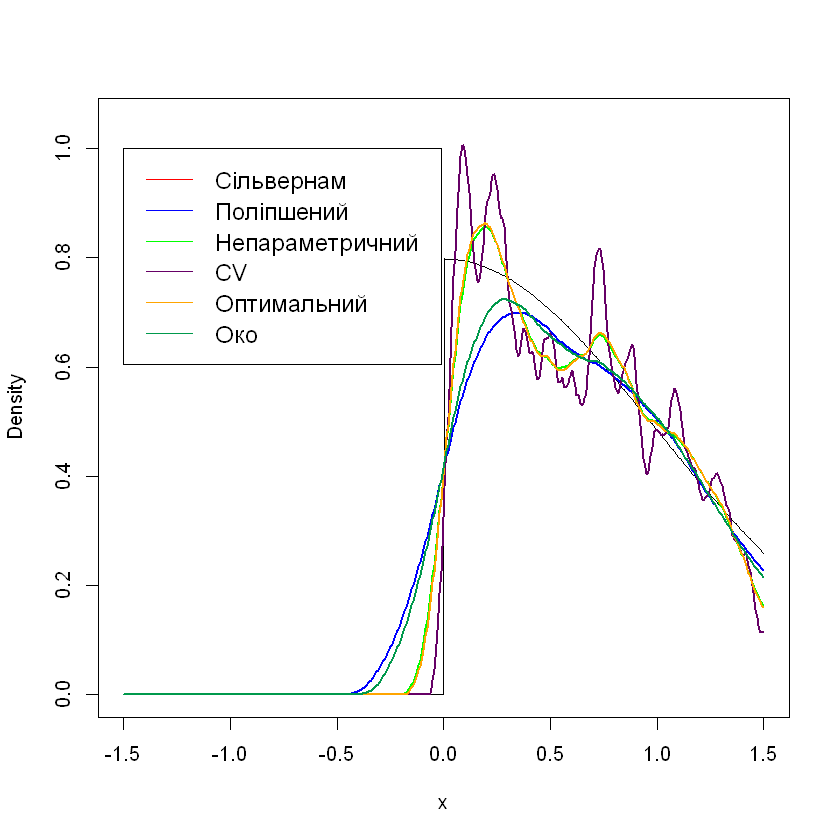

In [45]:
est = build_plot(500)

In [46]:
est

$h_silv
[1] 0.46131

$h_silvimpr
[1] 0.46131

$h_nonparam
[1] 0.1931599

$h_cv
[1] 0.06590143

$h_opt
[1] 0.1817121

$h_oko
[1] 0.4

Дивлячись на графіки з різними значеннями n можжна дійти наступних висновків:
1. Параметр hopt, на мою думку, найкраще себе показує для вибору параметра згладжування. Хоча можна посперечатись оскільки і непараметричний метод дає доволі схожі результати. А полімшений метод сілвермана взагалі чудово себе показує, якщо дивитись за межі десь першої сігми. 
2. h вибране за правилом Сільвермана не дуже сильно відрізняється від оптимального значення ( є лише доволі мінорні відхилення  біля "середнього значення" нашого розподілу). Використовувати не доцільно, оскільки інші варіанти вибору параметра кращі
3. Непараметрична значно краще покращує оцінку порівняно з правилом Сілвермана. Її можна застосовувати
4. В нашому випадку не можна вважати, що оцінки крос-валідації дають схожі результати до оптимальних

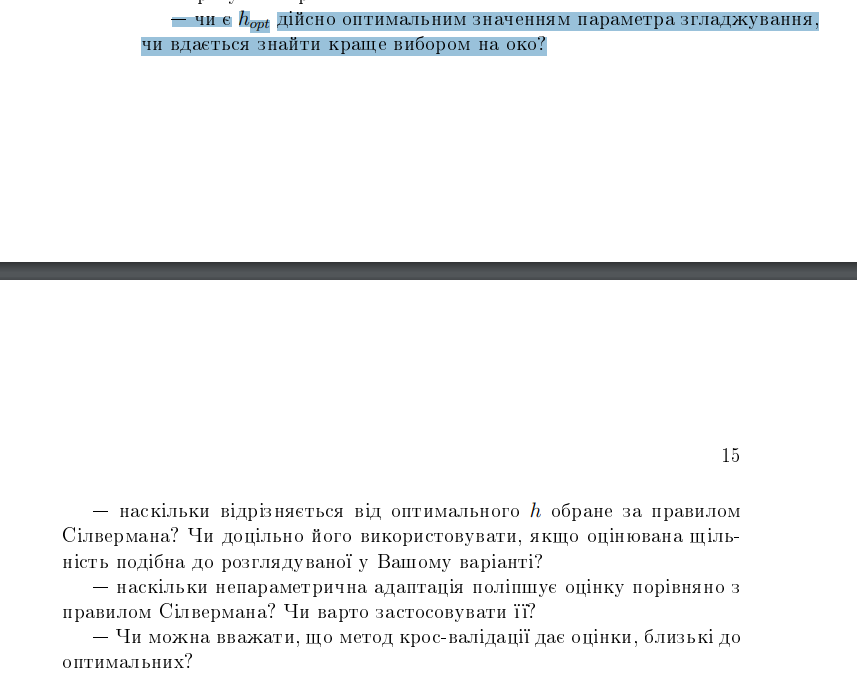